<a href="https://colab.research.google.com/github/surapaneni-meghana/Loan-Prediction/blob/main/Loan_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **BANK LOAN PREDICTION**

In [1]:
from google.colab import files
trainUp = files.upload()
testUp = files.upload()


Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


Saving test_Y3wMUE5_7gLdaTN.csv to test_Y3wMUE5_7gLdaTN.csv


In [26]:
# Now! Let's get to work on the dataset (Data cleaning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df_train = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df_test = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

In [4]:
df_train.shape

(614, 13)

In [5]:
df_test.shape

(367, 12)

In [6]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Missing Values:** Check where there are missing values and fix them appropriately

In [7]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


# Fill missing values

In [8]:
df_train['Gender'] = df_train['Gender'].fillna(
df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna(
df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(
df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(
df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(
df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(
df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(
df_train['Credit_History'].dropna().mode().values[0] )

# Encoding to numeric data; getting ready for training

In [9]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}


df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
#drop the uniques loan id
df_train.drop('Loan_ID', axis = 1, inplace = True)

In [10]:
# Need to convert 'Dependents' feature to numeric using pd.to_numeric

Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

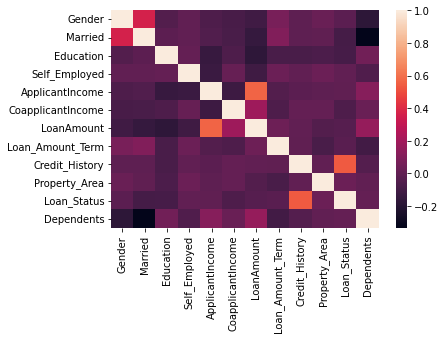

In [11]:
sns.heatmap(df_train.corr())

# Separating Target from the feature for training

In [25]:
y = df_train['Loan_Status']
X = df_train.drop('Loan_Status', axis = 1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

**USING LOGISTIC REGRESSION**

In [27]:

model = LogisticRegression()
model.fit(X_train, y_train)
print(type(X_test))
ypred = model.predict(X_test)

print(ypred)

<class 'pandas.core.frame.DataFrame'>
[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [15]:
accuracy = f1_score(y_test, ypred)
accuracy

0.8979591836734695

**Using Decision Tree**

In [17]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
ypred_tree = tree.predict(X_test)

accuracy = f1_score(y_test, ypred_tree)
accuracy

0.7810650887573963

# *Using Random Forest*

In [18]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
ypred_forest = forest.predict(X_test)

accuracy = f1_score(y_test, ypred_forest)
accuracy

0.8586387434554974